In [26]:
%matplotlib inline     
# 有了上面这个，就不需要show调用来显示图了
import pandas as pd
import numpy as np
import matplotlib as mpl    # 主要是为了修改一些参数
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

# 数据可视化工具
Gelman and Unwin 2011:
>A well-designed graph can display more information than a table of the same size, and more information than numbers embedded in text. Graphical displays allow and encourage direct visual comparisons.

* matplotlib
* seaborn
* PyX
* Bokeh
* ...

## matplotlib
    ipython notebook --pylab
    
    import matplotlib.pyplot as plt

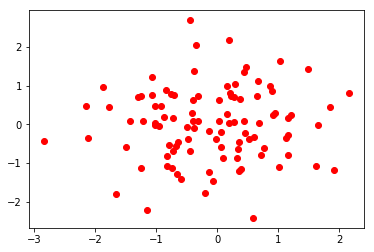

In [2]:
plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'ro')

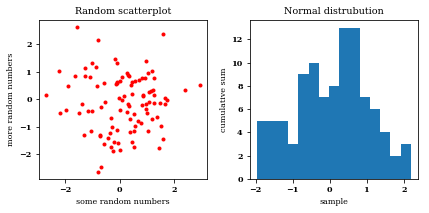

In [3]:
with mpl.rc_context(rc={'font.family': 'serif', 'font.weight': 'bold', 'font.size': 8}):
    fig = plt.figure(figsize=(6,3))
    ax1 = fig.add_subplot(121)
    ax1.set_xlabel('some random numbers')
    ax1.set_ylabel('more random numbers')
    ax1.set_title("Random scatterplot")
    plt.plot(np.random.normal(size=100), np.random.normal(size=100), 'r.')
    ax2 = fig.add_subplot(122)
    plt.hist(np.random.normal(size=100), bins=15)
    ax2.set_xlabel('sample')
    ax2.set_ylabel('cumulative sum')
    ax2.set_title("Normal distrubution")
    plt.tight_layout()
    plt.savefig("normalvars.png", dpi=150)

matplotlib是相对底层的绘图包，但是它也意味着灵活性。Pandas整合了matplotlib的功能，针对series以及DataFrame对象都提供了绘图功能.

## Pandas中的数据可视化

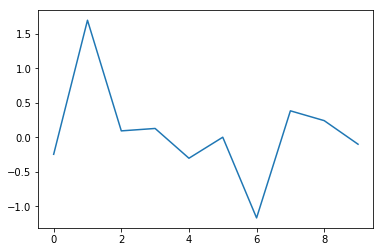

In [4]:
normals = pd.Series(np.random.normal(size=10))
normals.plot()

In [8]:
np.random.normal?

In [9]:
normals

0    0.773660
1    1.517423
2    0.655454
3    0.564990
4   -0.334805
5    2.125691
6    0.291731
7   -0.240961
8   -0.214155
9   -1.069460
dtype: float64

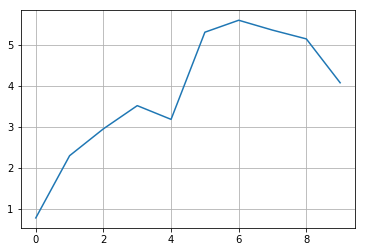

In [11]:
normals.cumsum().plot(grid=True)      # 先是累计求和，然后再绘图，并且绘制网格线。

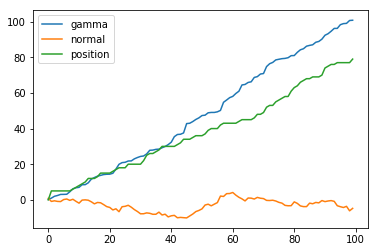

In [13]:
variables = pd.DataFrame({'normal':np.random.normal(size=100), 'gamma':np.random.gamma(1, size=100), 'position':np.random.poisson(size=100)})
variables.cumsum(0).plot()    # 0表示index方向，每一列各自求和

In [14]:
variables.cumsum(0)

,gamma,normal,position
0,0.225275,0.848572,0.0
1,0.958247,-0.900433,5.0
2,1.988396,-0.543995,5.0
3,2.438607,-0.878886,5.0
4,3.036415,-0.974517,5.0
...,...,...,...
95,98.307887,-3.851674,77.0
96,98.906436,-4.304966,77.0
97,99.042707,-3.651496,77.0
98,100.663956,-6.169505,77.0


### 多个subplot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7e9f9c62e8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7e9f9edc18>], dtype=object)

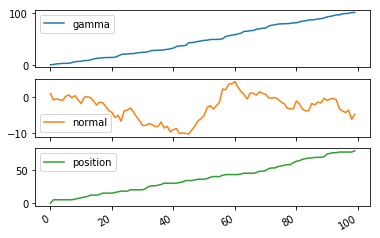

In [16]:
variables.cumsum(0).plot(subplots=True)    # 通过在plot方法里面指定subplots这个参数为True来实现独立绘图。

### 第二坐标轴

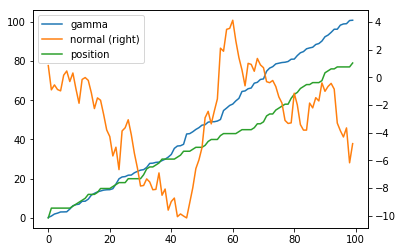

In [17]:
variables.cumsum(0).plot(secondary_y='normal')   # 这样的话，两个图的y的范围在一起。更容易放在一起比较。

### 直接使用subplots函数可以更好控制图形布局

In [2]:
plt.subplots?

In [5]:
variables = pd.DataFrame({'normal':np.random.normal(size=100),
                          'gamma':np.random.gamma(1, size=100), 
                          'poisson':np.random.poisson(size=100),
                         'binomial':np.random.binomial(n=10, p=0.3, size=100)})

Text(0,0.5,'cumulative sum')

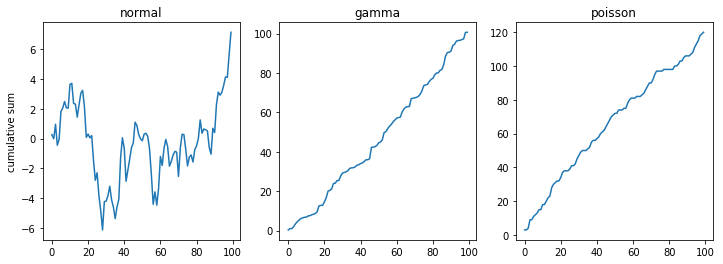

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))       #生成一行三列，figsize是指整体的图的大小
for i, var in enumerate(['normal', 'gamma', 'poisson']):
    variables[var].cumsum(0).plot(ax=axes[i], title=var)          # 通过plot可以直接指定要在哪个ax中作图。
axes[0].set_ylabel('cumulative sum')

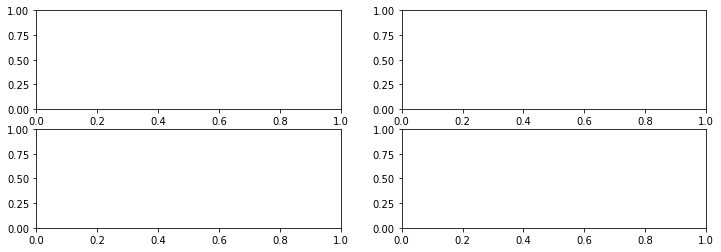

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4))

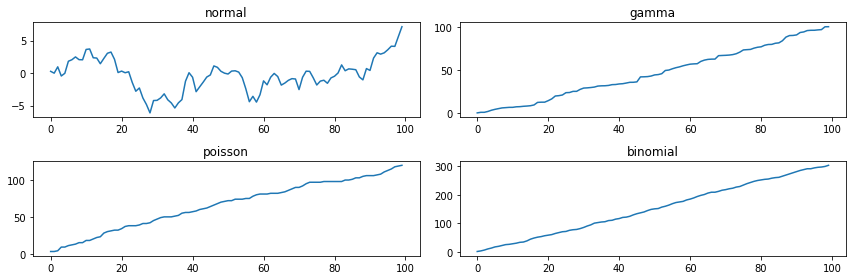

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4))
variables['normal'].cumsum(0).plot(ax=axes[0,0], title='normal')
variables['gamma'].cumsum(0).plot(ax=axes[0,1], title='gamma')
variables['poisson'].cumsum(0).plot(ax=axes[1,0], title='poisson')
variables['binomial'].cumsum(0).plot(axes=axes[1,1], title='binomial')
fig.tight_layout()      # ！！！使图之间的距离变得紧凑！！！

## Bar plots

>条形图通常用来显示或者比较数值，比如个数，数量。Pandas里面利用kind='bar'参数绘制条形图。

In [13]:
titanic = pd.read_csv('./data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


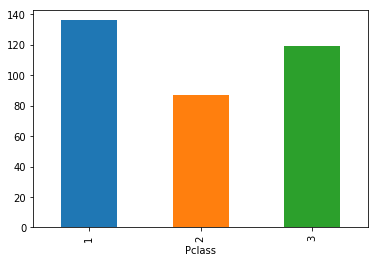

In [14]:
titanic.groupby('Pclass').Survived.sum().plot(kind='bar')

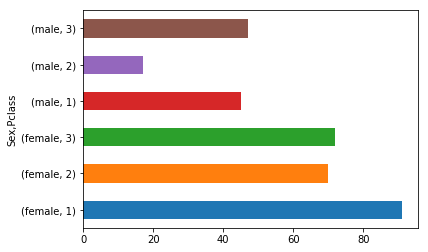

In [21]:
titanic.groupby(['Sex', 'Pclass']).Survived.sum().plot(kind='barh')    # barh是横向绘图

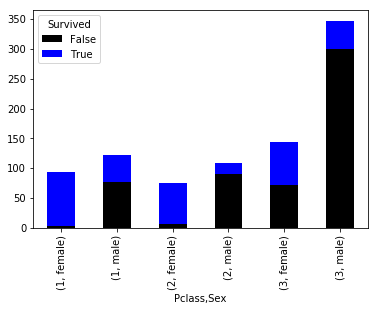

In [22]:
death_counts = pd.crosstab([titanic.Pclass, titanic.Sex], titanic.Survived.astype(bool))
death_counts.plot(kind='bar',stacked=True, color=['black', 'blue'], grid=False)    # stackd=True就表示是堆叠着；color第一个表示没有生还，第二个是生还的

In [23]:
death_counts     # 统计出来的数据

Survived       False  True 
Pclass Sex                 
1      female      3     91
       male       77     45
2      female      6     70
       male       91     17
3      female     72     72
       male      300     47

In [24]:
pd.crosstab?

### 比例条形图

In [25]:
death_counts.div?

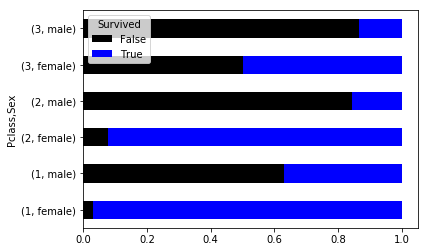

In [27]:
death_counts.div(death_counts.sum(1).astype(float),axis=0).plot(kind='barh', stacked=True, color=['black', 'blue'])

## 直方图

>直方图用于频率分布，y轴表示频率分布（数值或者比例）

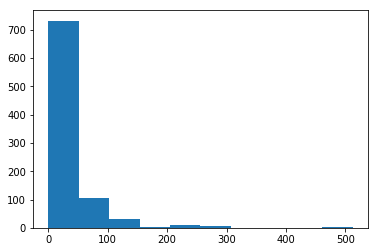

In [28]:
titanic.Fare.hist(grid=False)    # 直方图，看来是使用hist来使用。

`hist`函数把连续的fare值分成**bins**，缺省为10.这个bins也就是分成多少个区段的意思。

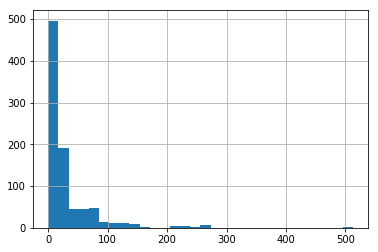

In [29]:
titanic.Fare.hist(bins=30)

In [30]:
titanic.Fare.hist?

**density plot**是真实密度的估计，我们用kind='kde'， ‘kde’=**Kernel density estimate**

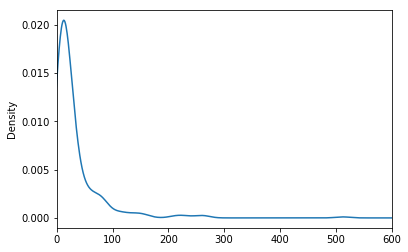

In [31]:
titanic.Fare.dropna().plot(kind='kde', xlim=(0, 600))

同时显示

### Boxplot

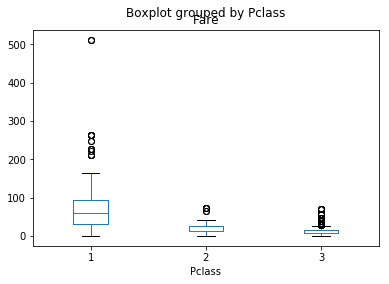

In [32]:
titanic.boxplot(column='Fare', by='Pclass', grid=False)     # by指明了以什么进行分类；column指明是取什么的值，盒子中的点事分位数，盒子外面的点就是偏离值。

下面的演示是把值直接叠加到上面的图里面。

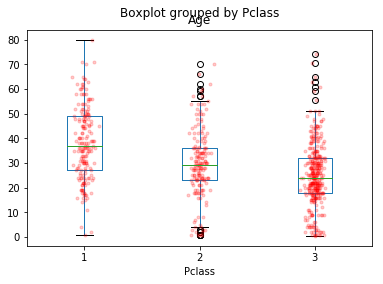

In [33]:
bp = titanic.boxplot(column='Age', by='Pclass', grid=False)
for i in [1, 2, 3]:
    y = titanic.Age[titanic.Pclass==i].dropna()    # 这个地方可以直接通过条件来进行过滤，方便！！！
    # add some random 'jitter' to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))     # 这个地方x实际上是随机生成的值。
    plt.plot(x, y, 'r.', alpha=0.2)

### 如果数量很大，可以考虑
1. 减小alpha，让点透明
2. 使用‘jitter’，避免重叠

# Scatterplots

In [34]:
baseball = pd.read_csv('./data/baseball.csv')
baseball.head()

,id,player,year,stint,team,...,ibb,hbp,sh,sf,gidp
0,88641,womacto01,2006,2,CHN,...,0.0,0.0,3.0,0.0,0.0
1,88643,schilcu01,2006,1,BOS,...,0.0,0.0,0.0,0.0,0.0
2,88645,myersmi01,2006,1,NYA,...,0.0,0.0,0.0,0.0,0.0
3,88649,helliri01,2006,1,MIL,...,0.0,0.0,0.0,0.0,0.0
4,88650,johnsra05,2006,1,NYA,...,0.0,0.0,0.0,0.0,0.0


(0, 200)

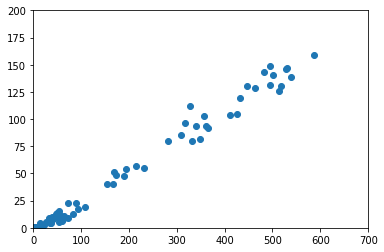

In [35]:
plt.scatter(baseball.ab, baseball.h)
plt.xlim(0, 700)
plt.ylim(0, 200)

(0, 200)

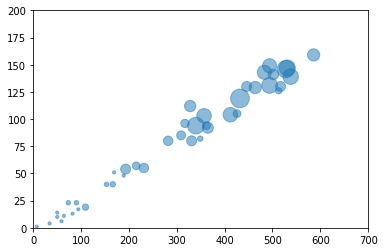

In [36]:
# 下面展示的是一种特殊效果的
plt.scatter(baseball.ab, baseball.h,  s= baseball.hr*10, alpha=0.5)      # s实际上就是size，大小
plt.xlim(0, 700)
plt.ylim(0, 200)

(0, 200)

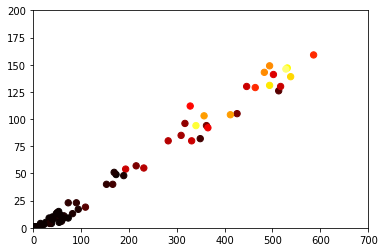

In [38]:
# 下面是另外的一在那个特殊的效果
plt.scatter(baseball.ab, baseball.h, c=baseball.hr, s=40, cmap='hot')      # c实际上就是color颜色；！！！cmap实际上是不同的颜色值取的对应的颜色的字母！！原来是要取的颜色的字母。
plt.xlim(0, 700)
plt.ylim(0, 200)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


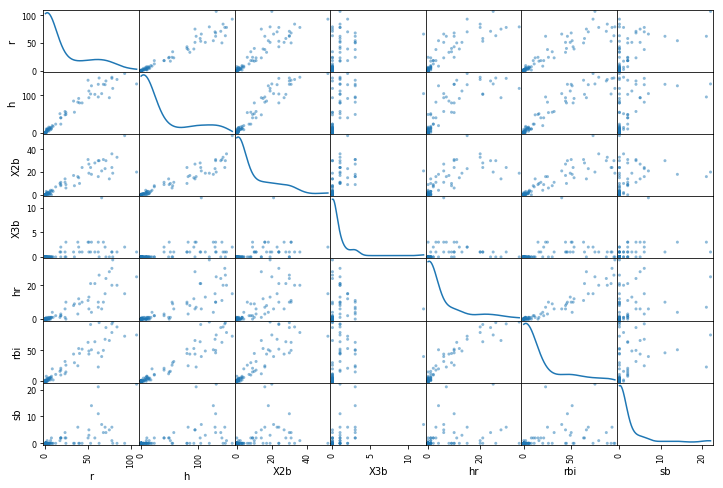

In [39]:
_ = pd.scatter_matrix(baseball.loc[:, 'r': 'sb'], figsize=(12,8), diagonal='kde')       # 实际上是两两进行比较。diagonal实际上是对角线的处理方式！